In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("D:\\machine learning practice\\weather classification\\weather_classification_data.csv")
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [5]:
df.shape

(13200, 11)

Feature Engineering + EDA

In [6]:
df['Heat Index'] = 0.5 * (df['Temperature'] + 61.0 + ((df['Temperature'] - 68.0) * 1.2) + (df['Humidity'] * 0.094))

df['Wind Chill'] = 13.12 + 0.6215 * df['Temperature'] - 11.37 * (df['Wind Speed']**0.16) + 0.3965 * df['Temperature'] * (df['Wind Speed']**0.16)

df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Heat Index,Wind Chill
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,8.531,13.478732
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,37.112,43.123533
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,25.708,32.481762
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,35.401,40.681791
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,22.878,28.854897


In [7]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
Heat Index              0
Wind Chill              0
dtype: int64

In [8]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [10]:
for feature in df.columns:
    print(f"{feature} has type of -------> {df[feature].dtype} \n")

Temperature has type of -------> float64 

Humidity has type of -------> int64 

Wind Speed has type of -------> float64 

Precipitation (%) has type of -------> float64 

Cloud Cover has type of -------> object 

Atmospheric Pressure has type of -------> float64 

UV Index has type of -------> int64 

Season has type of -------> object 

Visibility (km) has type of -------> float64 

Location has type of -------> object 

Weather Type has type of -------> object 

Heat Index has type of -------> float64 

Wind Chill has type of -------> float64 



In [12]:
Numerical_col=[]
Categorical_col=[]
for feature in df.columns:
    if df[feature].dtype!="object":
        Numerical_col.append(feature)
    else:
        Categorical_col.append(feature)

Categorical_col,Numerical_col


(['Cloud Cover', 'Season', 'Location', 'Weather Type'],
 ['Temperature',
  'Humidity',
  'Wind Speed',
  'Precipitation (%)',
  'Atmospheric Pressure',
  'UV Index',
  'Visibility (km)',
  'Heat Index',
  'Wind Chill'])

In [13]:
Continuous_feat=[]
Discrete_feat=[]
for feature in Numerical_col:
    if len(df[feature].unique())<=20:
        Discrete_feat.append(feature)
    else:
        Continuous_feat.append(feature)

Continuous_feat

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'Visibility (km)',
 'Heat Index',
 'Wind Chill']

In [14]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [15]:
df["Weather Type"]=df["Weather Type"].map({"Sunny":1,"Cloudy":2,"Rainy":3,"Snowy":4})

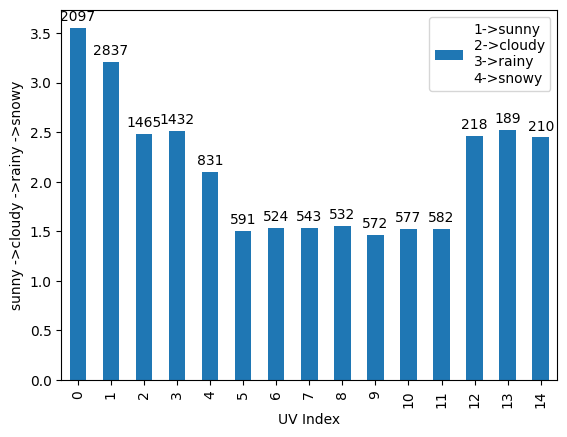

In [16]:
for feature in Discrete_feat:
    grouped_data = df.groupby(feature)['Weather Type'].agg(['mean', 'count'])
    ax = grouped_data['mean'].plot.bar()

    for idx, (mean, count) in enumerate(zip(grouped_data['mean'], grouped_data['count'])):
        ax.annotate(f'{count}', xy=(idx, mean), xytext=(0, 3), 
                    textcoords='offset points', ha='center', va='bottom')

    plt.xlabel(feature)
    plt.ylabel("sunny ->cloudy ->rainy ->snowy")
    plt.legend([f"1->sunny\n2->cloudy\n3->rainy\n4->snowy"])
    plt.show()

In [17]:
df.loc[df["UV Index"].isin([12, 13, 14]), "Weather Type"] = 1
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type', 'Heat Index',
       'Wind Chill'],
      dtype='object')

[]

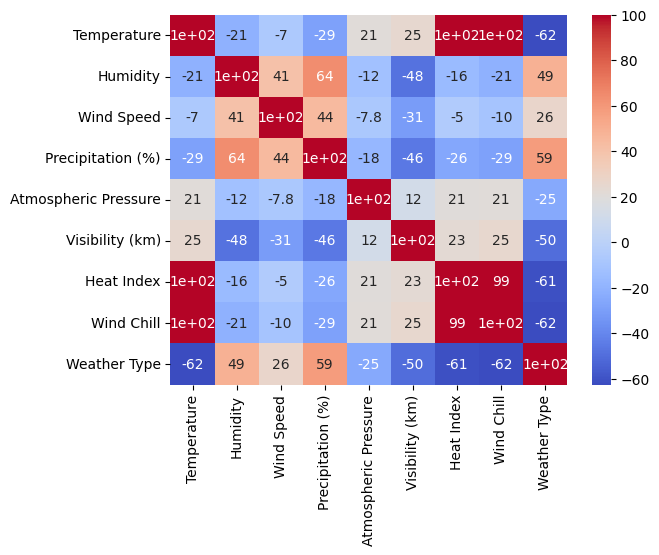

In [18]:
Continuous_feat_temp=Continuous_feat.copy()
Continuous_feat_temp.append("Weather Type")

matrix=df[Continuous_feat_temp].corr()
sns.heatmap(matrix*100,cmap="coolwarm",annot=True)
plt.plot()



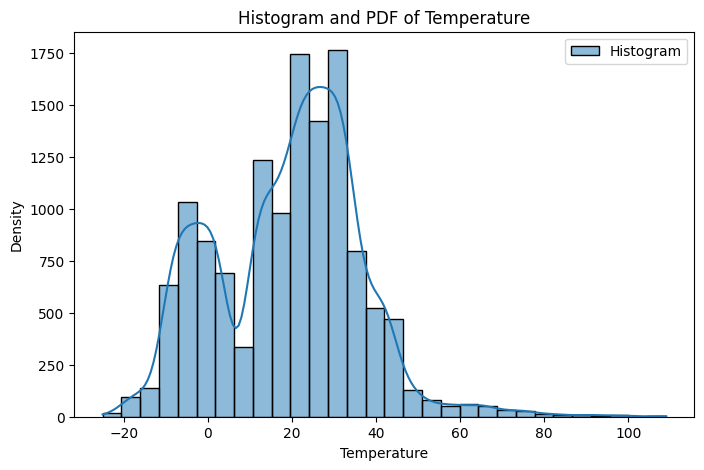

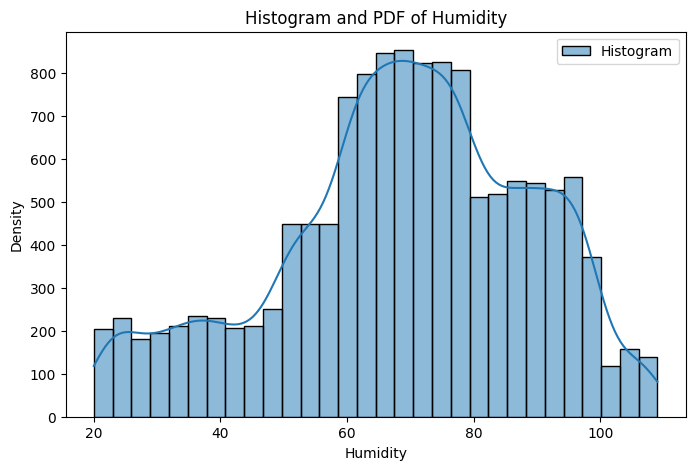

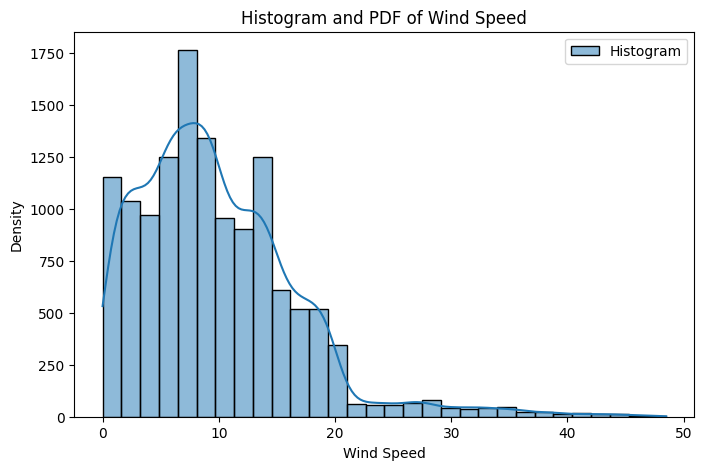

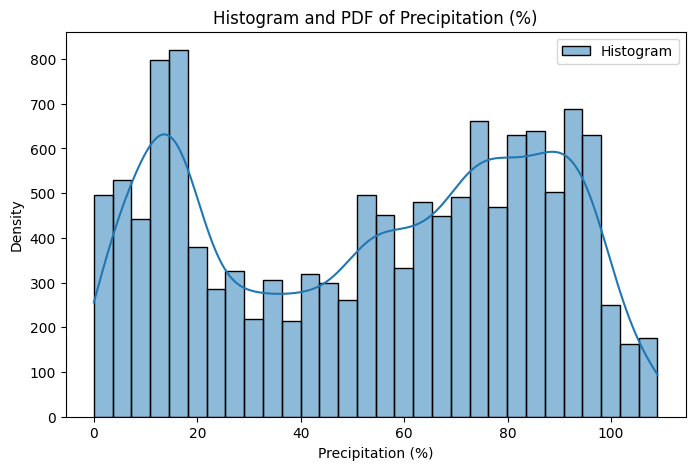

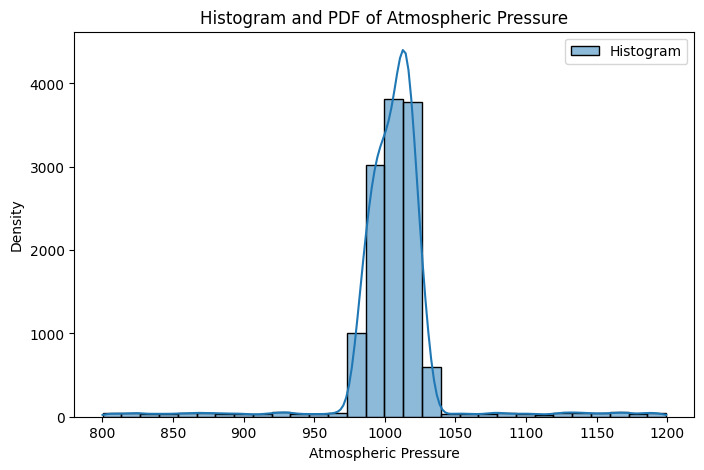

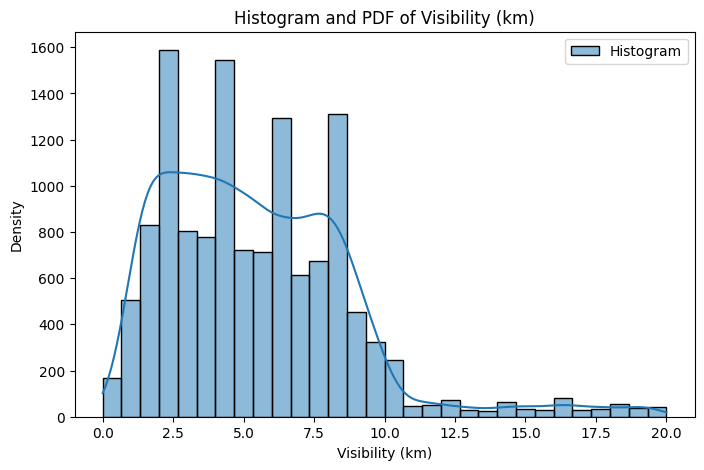

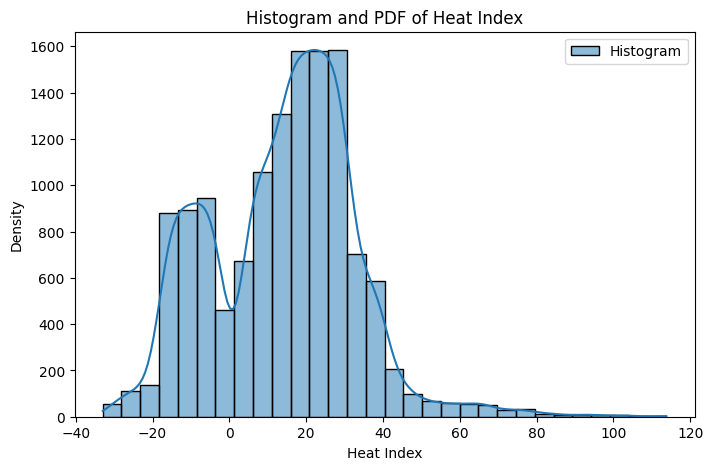

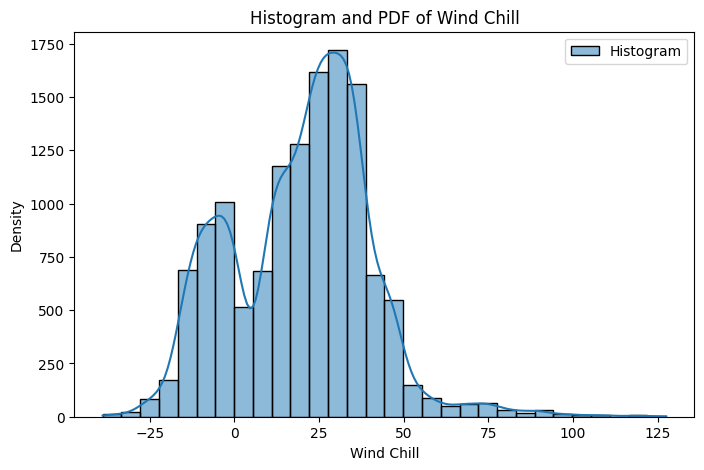

In [19]:
for feature in Continuous_feat:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, label='Histogram')
    plt.title(f'Histogram and PDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [21]:
from scipy.stats import yeojohnson, skew
for feature in Continuous_feat:
    print(f"{feature} has skewness of {skew(df[feature])} \n")

Temperature has skewness of 0.22171624802466527 

Humidity has skewness of -0.4015686261644231 

Wind Speed has skewness of 1.360107995456309 

Precipitation (%) has skewness of -0.15243974196302806 

Atmospheric Pressure has skewness of -0.293865207744346 

Visibility (km) has skewness of 1.2331350151759246 

Heat Index has skewness of 0.26622138671908596 

Wind Chill has skewness of 0.2236141831181182 



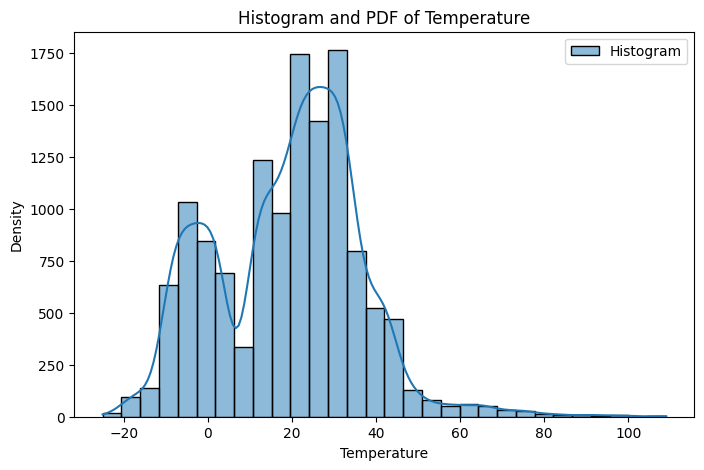

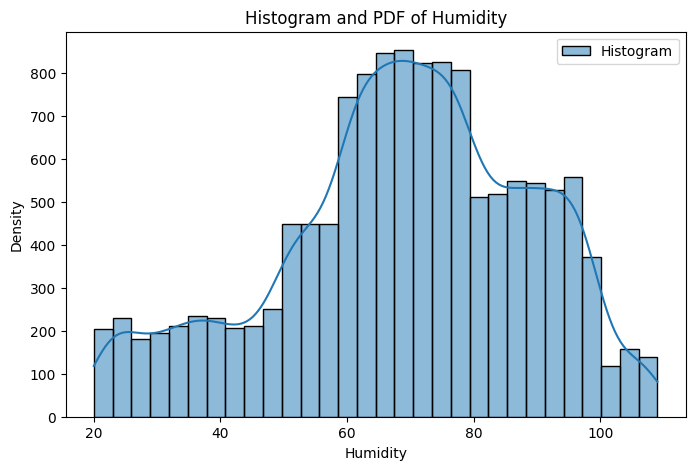

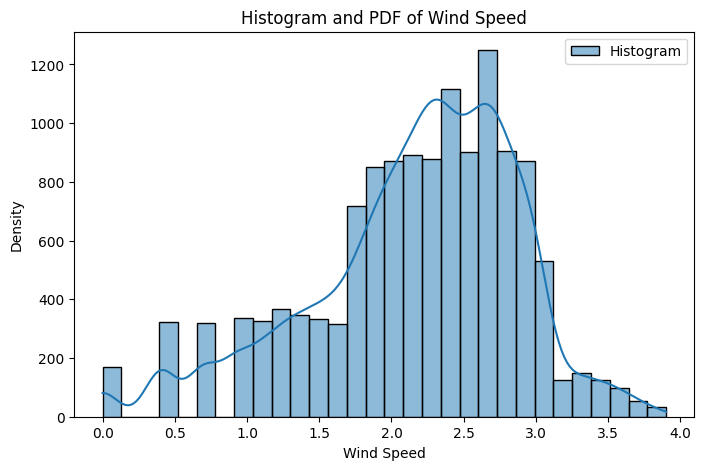

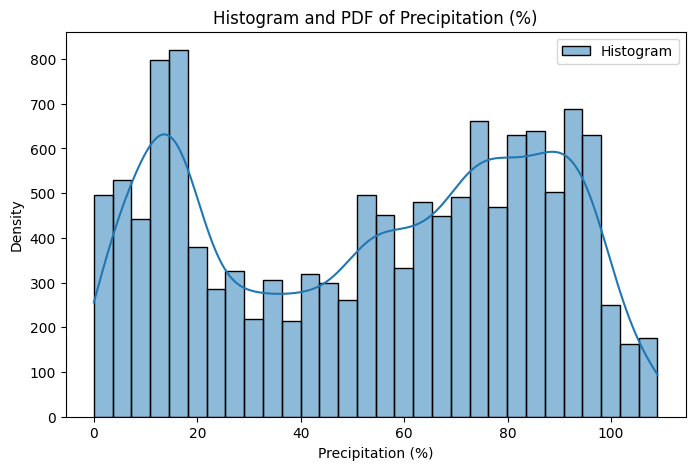

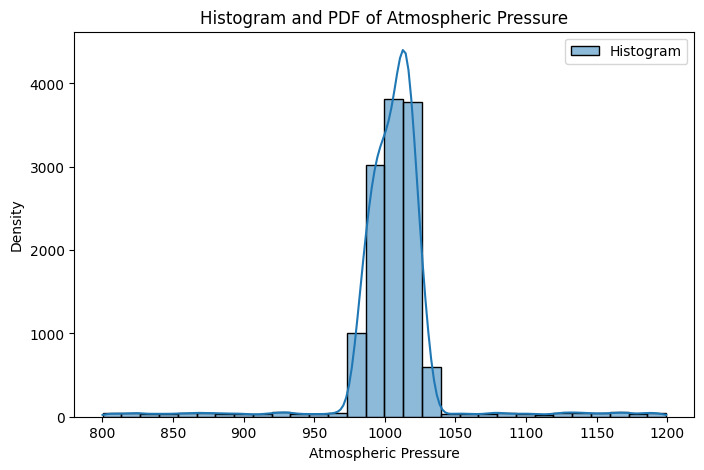

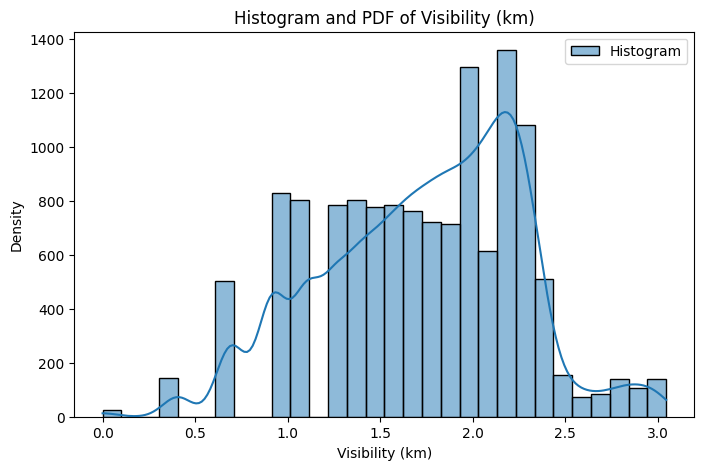

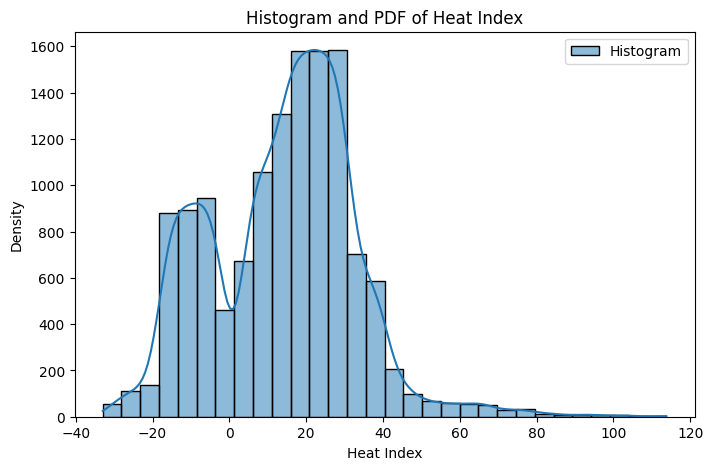

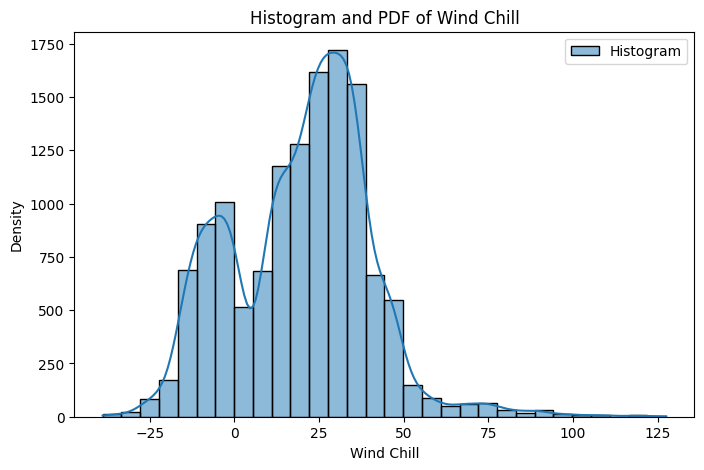

In [22]:
df["Wind Speed"]=np.log1p(df["Wind Speed"])
df["Visibility (km)"]=np.log1p(df["Visibility (km)"])

for feature in Continuous_feat:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True, bins=30, label='Histogram')
    plt.title(f'Histogram and PDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

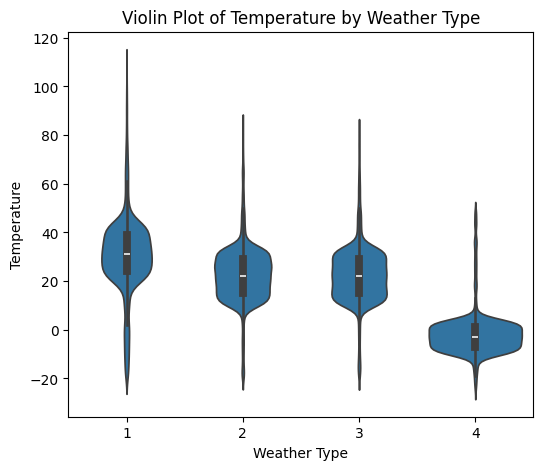

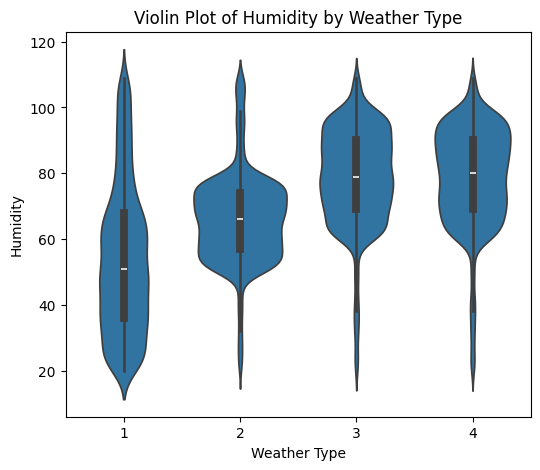

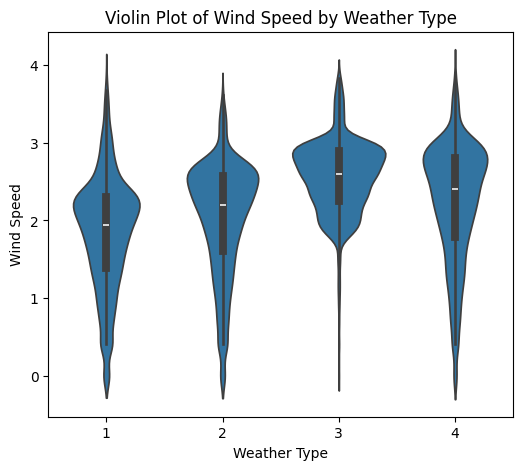

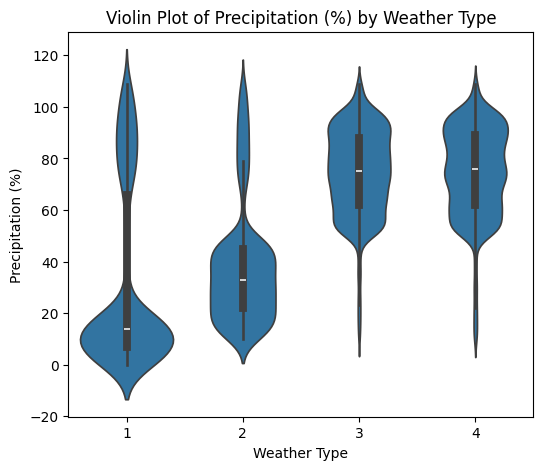

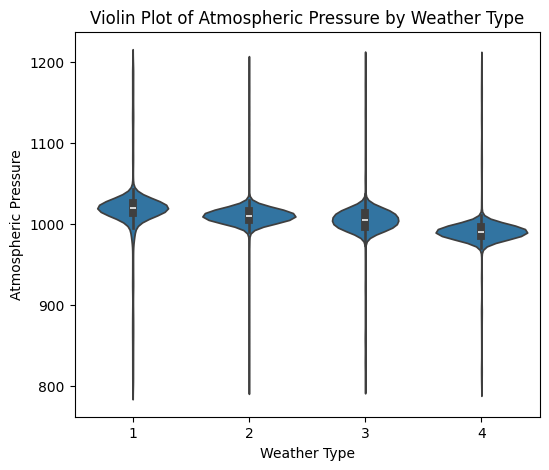

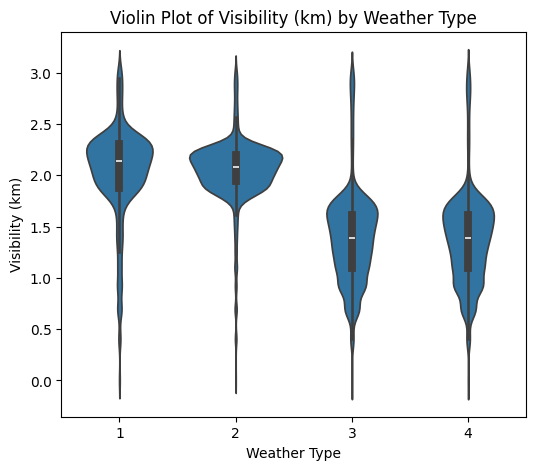

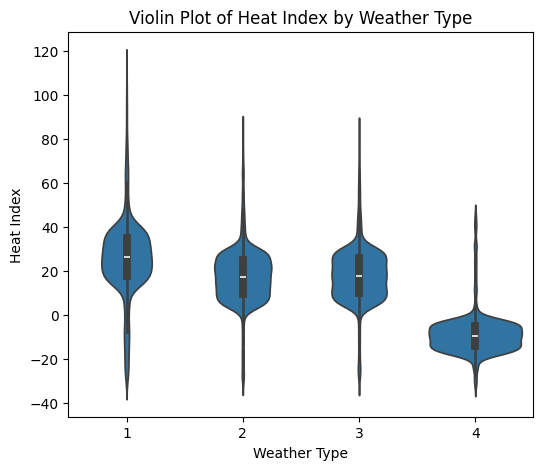

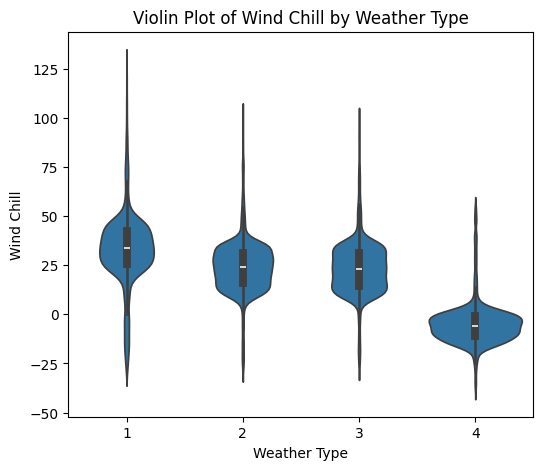

In [23]:
for feature in Continuous_feat:
    plt.figure(figsize=(6, 5))
    sns.violinplot(x='Weather Type', y=feature, data=df)
    plt.title(f'Violin Plot of {feature} by Weather Type')
    plt.ylabel(feature)
    plt.show()

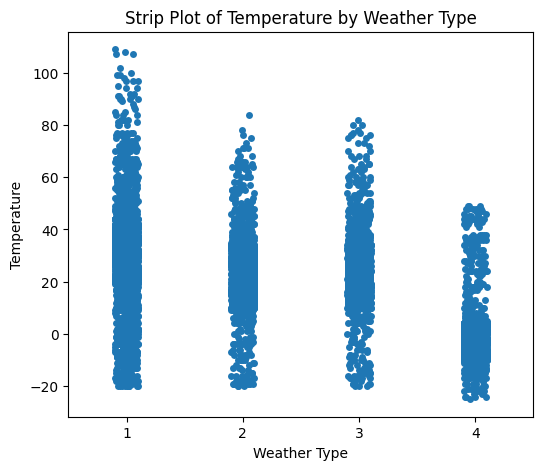

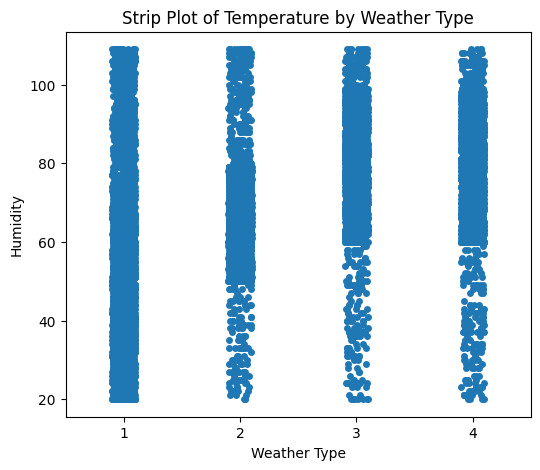

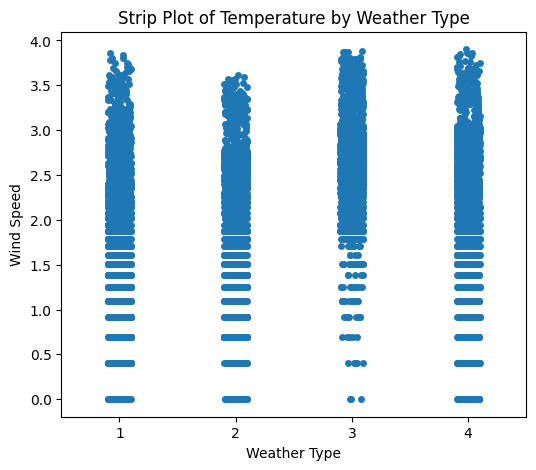

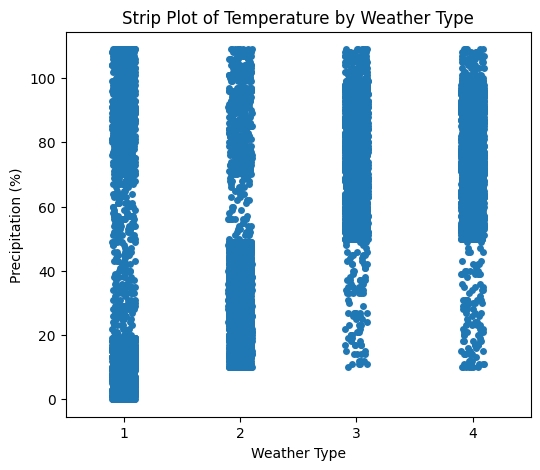

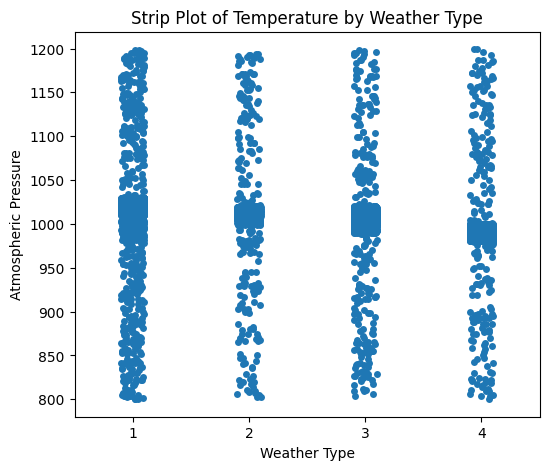

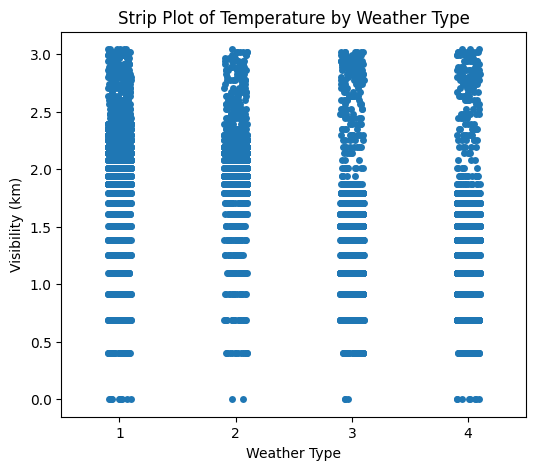

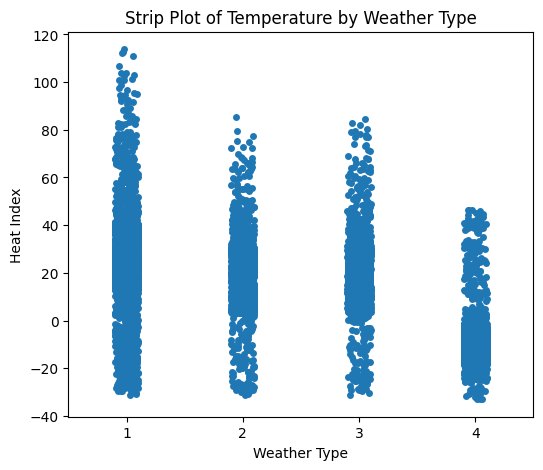

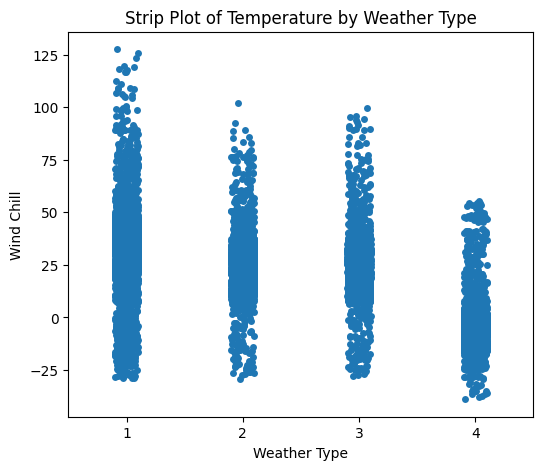

In [24]:
for feature in Continuous_feat:
    plt.figure(figsize=(6, 5))
    sns.stripplot(x='Weather Type', y=feature, data=df, jitter=True)
    plt.title('Strip Plot of Temperature by Weather Type')
    plt.ylabel(feature)
    plt.show()

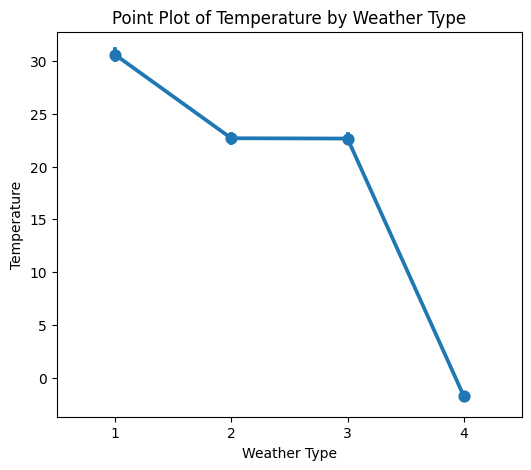

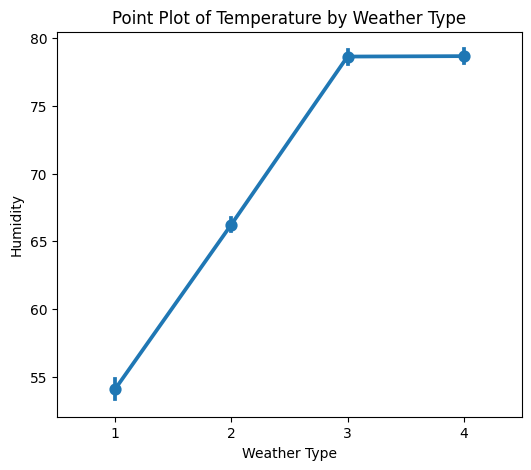

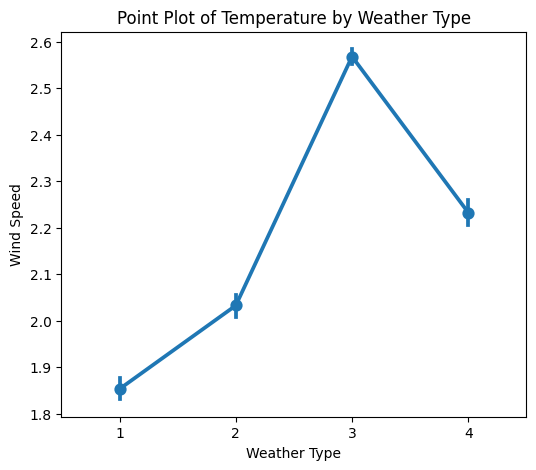

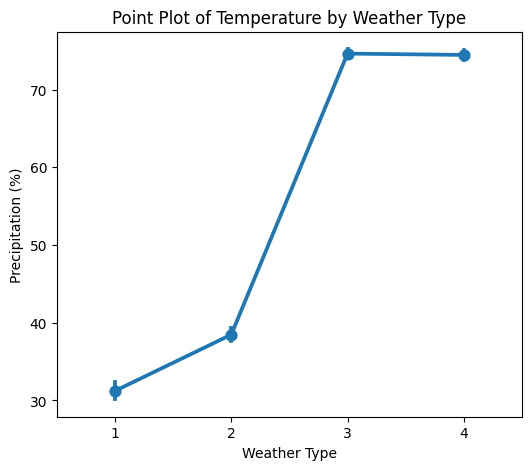

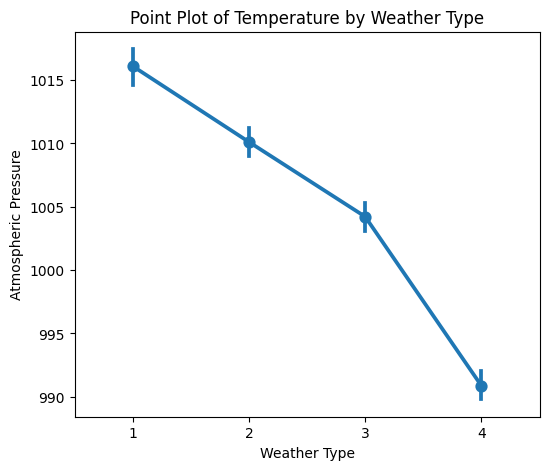

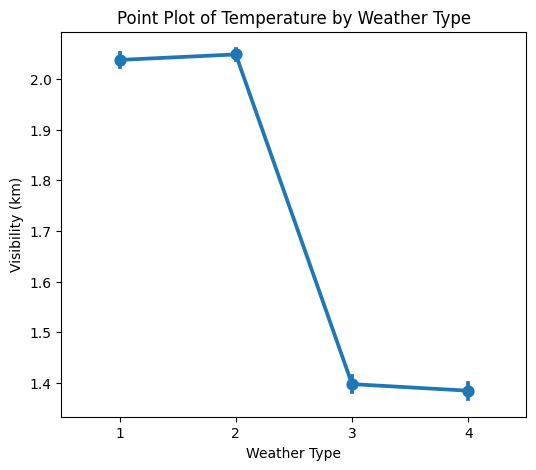

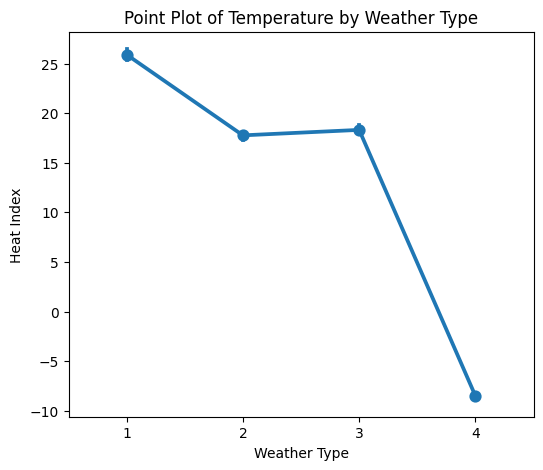

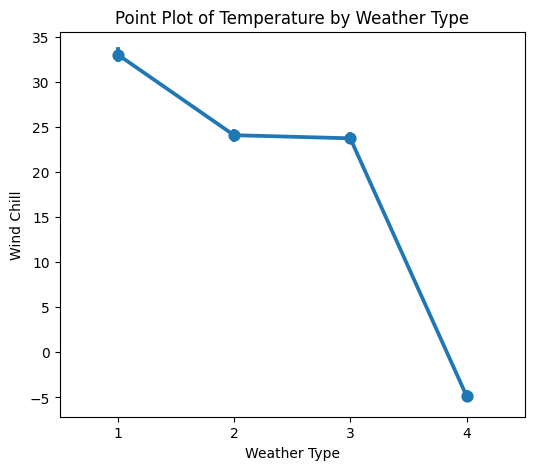

In [25]:
for feature in Continuous_feat:
    plt.figure(figsize=(6, 5))
    sns.pointplot(x='Weather Type', y=feature, data=df)
    plt.title('Point Plot of Temperature by Weather Type')
    plt.ylabel(feature)
    plt.show()

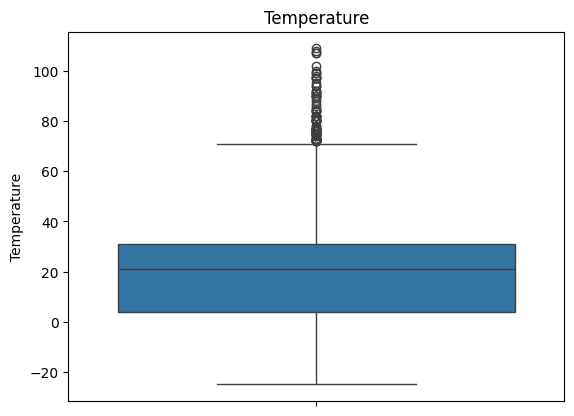

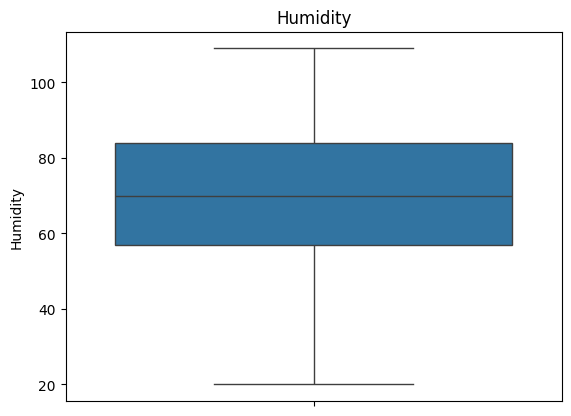

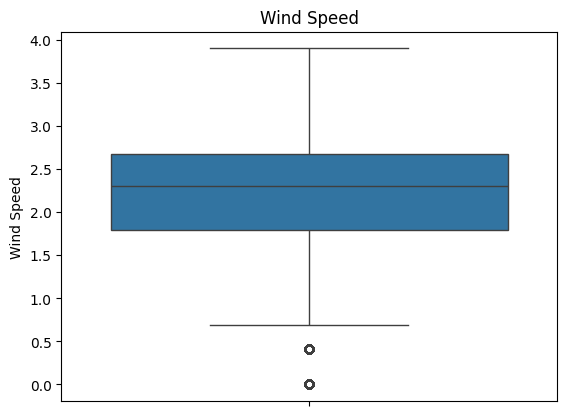

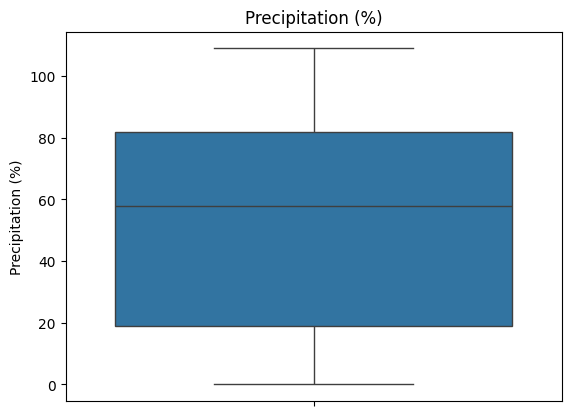

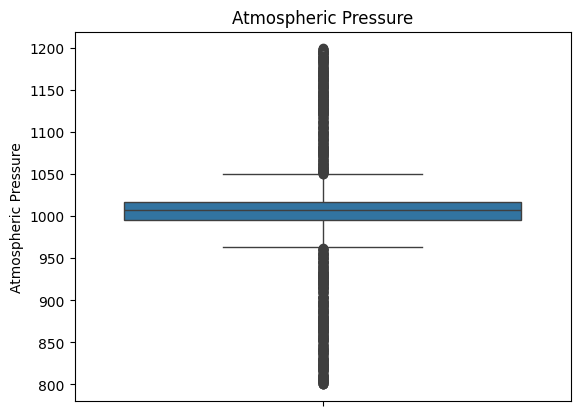

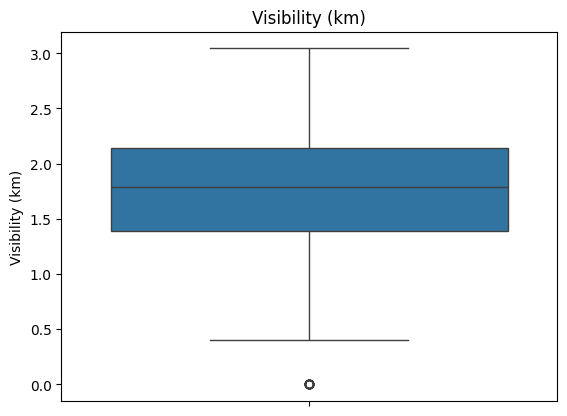

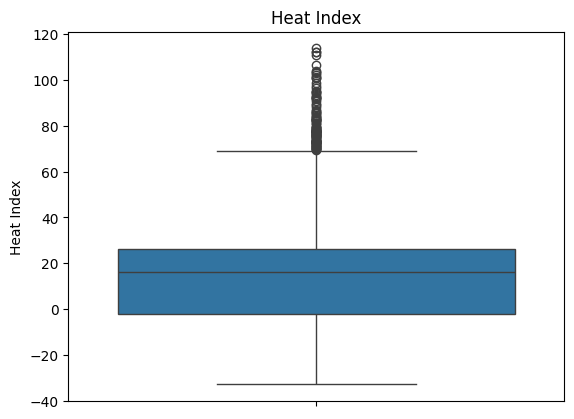

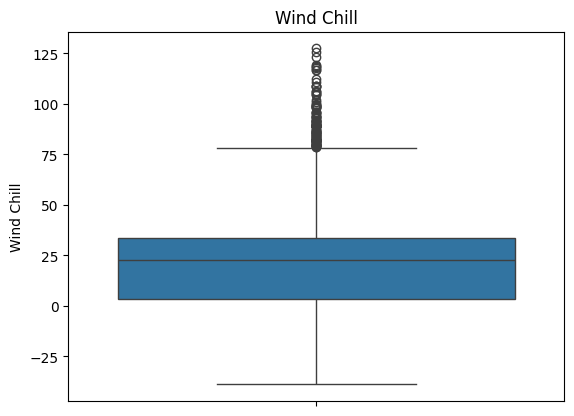

In [26]:
for feature in Continuous_feat:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

In [27]:
Continuous_feat

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'Visibility (km)',
 'Heat Index',
 'Wind Chill']

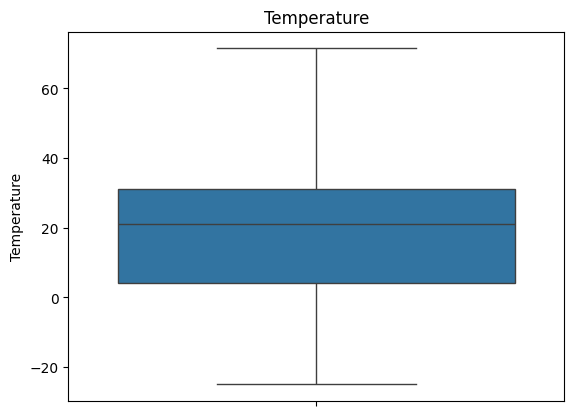

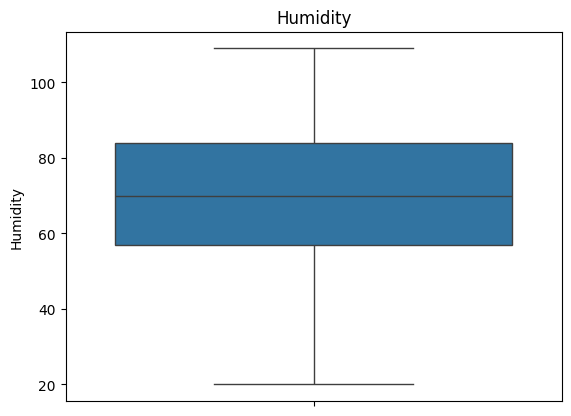

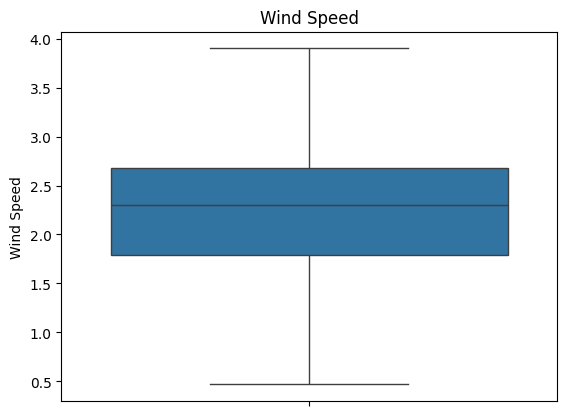

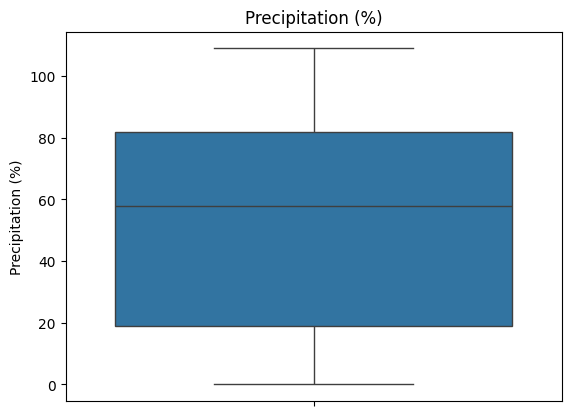

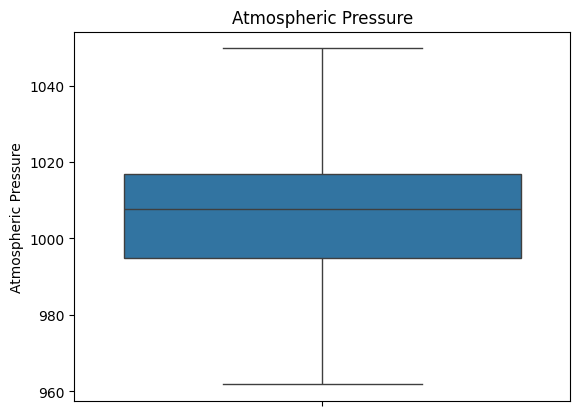

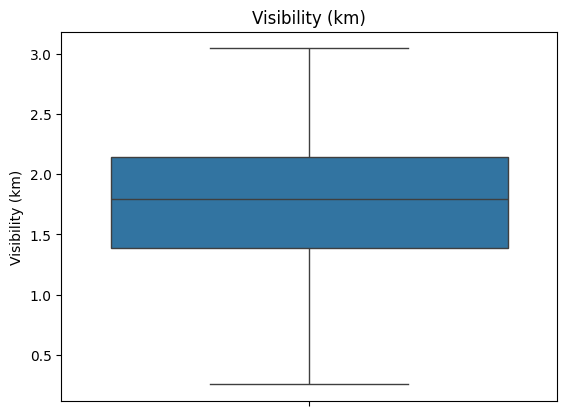

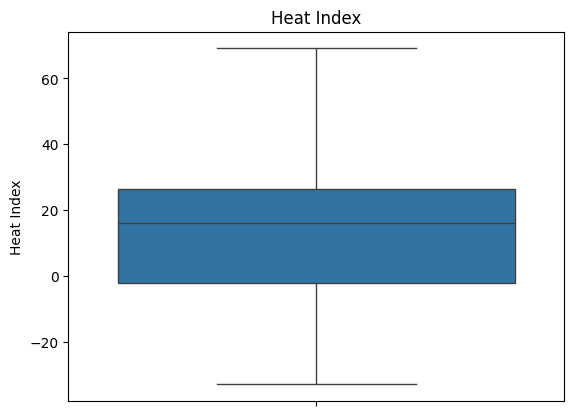

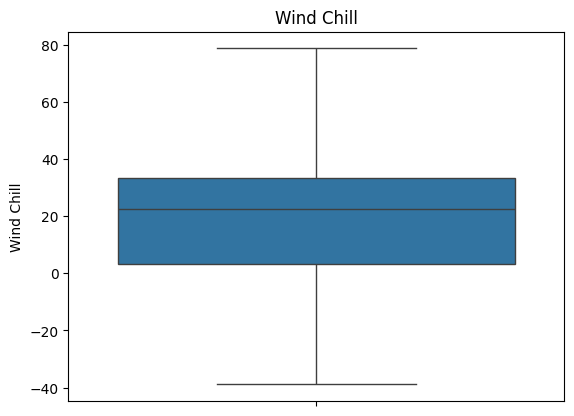

In [28]:
for feature in df[["Temperature","Wind Speed","Atmospheric Pressure","Visibility (km)","Heat Index","Wind Chill"]]:
    Q1,Q3=np.percentile(df[feature],[25,75])
    IQR=Q3-Q1
    upper=Q3+1.5*(IQR)
    lower=Q1-1.5*(IQR)
    df[feature]=np.clip(df[feature],lower,upper)
for feature in Continuous_feat:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

In [29]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Heat Index,Wind Chill
0,14.0,73,2.351375,82.0,partly cloudy,1010.82,2,Winter,1.504077,inland,3,8.531,13.478732
1,39.0,96,2.251292,71.0,partly cloudy,1011.43,7,Spring,2.397895,inland,2,37.112,43.123533
2,30.0,64,2.079442,16.0,clear,1018.72,5,Spring,1.871802,mountain,1,25.708,32.481762
3,38.0,83,0.916291,82.0,clear,1026.25,7,Spring,0.693147,coastal,1,35.401,40.681791
4,27.0,74,2.890372,66.0,overcast,990.67,1,Winter,1.252763,mountain,3,22.878,28.854897


In [30]:
Categorical_col

['Cloud Cover', 'Season', 'Location', 'Weather Type']

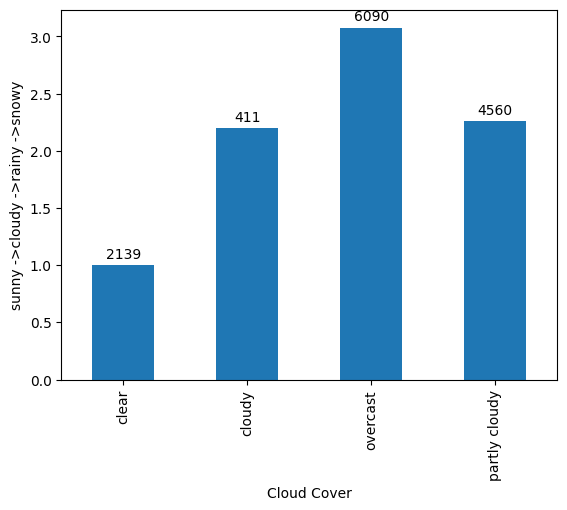

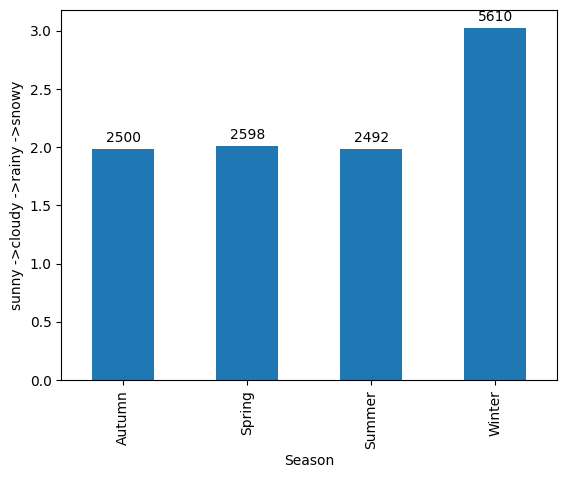

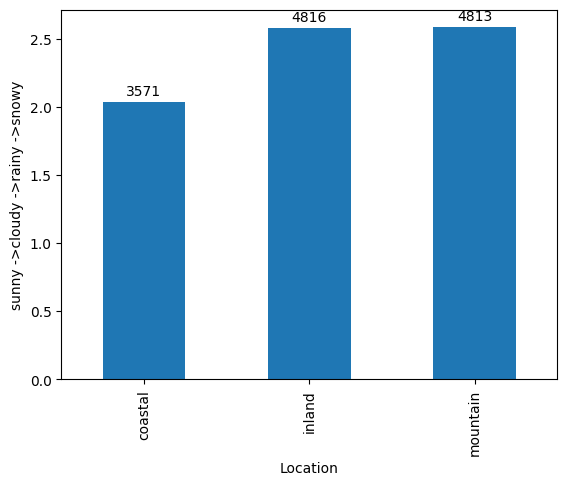

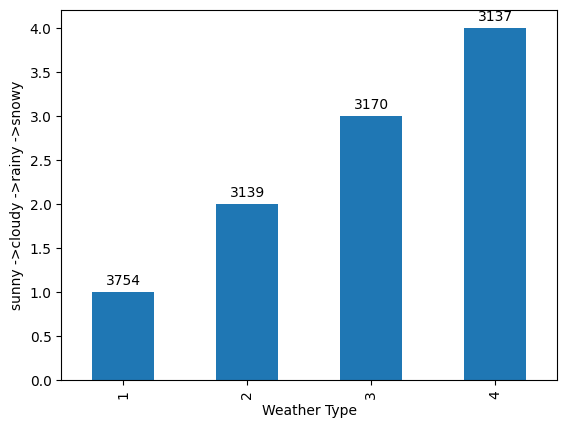

In [31]:
for feature in Categorical_col:
    grouped_data = df.groupby(feature)['Weather Type'].agg(['mean', 'count'])
    ax = grouped_data['mean'].plot.bar()

    for idx, (mean, count) in enumerate(zip(grouped_data['mean'], grouped_data['count'])):
        ax.annotate(f'{count}', xy=(idx, mean), xytext=(0, 3), 
                    textcoords='offset points', ha='center', va='bottom')

    plt.xlabel(feature)
    plt.ylabel("sunny ->cloudy ->rainy ->snowy")
    plt.show()

encoding

In [33]:
df["Location"]=df["Location"].map({"coastal":1,"inland":2,"mountain":3})
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Heat Index,Wind Chill
0,14.0,73,2.351375,82.0,partly cloudy,1010.82,2,Winter,1.504077,NaN,3,8.531,13.478732
1,39.0,96,2.251292,71.0,partly cloudy,1011.43,7,Spring,2.397895,NaN,2,37.112,43.123533
2,30.0,64,2.079442,16.0,clear,1018.72,5,Spring,1.871802,NaN,1,25.708,32.481762
3,38.0,83,0.916291,82.0,clear,1026.25,7,Spring,0.693147,NaN,1,35.401,40.681791
4,27.0,74,2.890372,66.0,overcast,990.67,1,Winter,1.252763,NaN,3,22.878,28.854897


In [34]:
df1=pd.get_dummies(df, columns=['Cloud Cover', 'Season'], drop_first=True)
df1.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Location,Weather Type,Heat Index,Wind Chill,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter
0,14.0,73,2.351375,82.0,1010.82,2,1.504077,NaN,3,8.531,13.478732,False,False,True,False,False,True
1,39.0,96,2.251292,71.0,1011.43,7,2.397895,NaN,2,37.112,43.123533,False,False,True,True,False,False
2,30.0,64,2.079442,16.0,1018.72,5,1.871802,NaN,1,25.708,32.481762,False,False,False,True,False,False
3,38.0,83,0.916291,82.0,1026.25,7,0.693147,NaN,1,35.401,40.681791,False,False,False,True,False,False
4,27.0,74,2.890372,66.0,990.67,1,1.252763,NaN,3,22.878,28.854897,False,True,False,False,False,True


In [35]:
for feature in df1.columns:
    print(f"{feature} has type of -------> {df1[feature].dtype} \n")

Temperature has type of -------> float64 

Humidity has type of -------> int64 

Wind Speed has type of -------> float64 

Precipitation (%) has type of -------> float64 

Atmospheric Pressure has type of -------> float64 

UV Index has type of -------> int64 

Visibility (km) has type of -------> float64 

Location has type of -------> float64 

Weather Type has type of -------> int64 

Heat Index has type of -------> float64 

Wind Chill has type of -------> float64 

Cloud Cover_cloudy has type of -------> bool 

Cloud Cover_overcast has type of -------> bool 

Cloud Cover_partly cloudy has type of -------> bool 

Season_Spring has type of -------> bool 

Season_Summer has type of -------> bool 

Season_Winter has type of -------> bool 



In [36]:
for feature in df1.columns:
    if df1[feature].dtype=="bool":
        df1[feature]=df1[feature].astype(int)
df1.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Location,Weather Type,Heat Index,Wind Chill,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter
0,14.0,73,2.351375,82.0,1010.82,2,1.504077,NaN,3,8.531,13.478732,0,0,1,0,0,1
1,39.0,96,2.251292,71.0,1011.43,7,2.397895,NaN,2,37.112,43.123533,0,0,1,1,0,0
2,30.0,64,2.079442,16.0,1018.72,5,1.871802,NaN,1,25.708,32.481762,0,0,0,1,0,0
3,38.0,83,0.916291,82.0,1026.25,7,0.693147,NaN,1,35.401,40.681791,0,0,0,1,0,0
4,27.0,74,2.890372,66.0,990.67,1,1.252763,NaN,3,22.878,28.854897,0,1,0,0,0,1


Now modeling (Supervised) XGB

In [37]:
from sklearn.model_selection import train_test_split
X=df1.drop("Weather Type",axis=1)
Y=df1["Weather Type"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)
X_train.shape,X_test.shape

((10560, 16), (2640, 16))

In [38]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train_scaled=SC.fit_transform(X_train)
X_test_scaled=SC.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)
Y_train = Y_train - 1
Y_test=Y_test-1

c:\Users\mohsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\mohsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\mohsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [41]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Updated objective for multiclass classification
    'num_class': 4,  # Number of classes
    'learning_rate': 0.4,
    'eta': 0.6,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 1,
    'n_estimators': 898,
    'seed': 42
}

# Initialize the XGBoost classifier with the specified parameters
model = XGBClassifier(**params)

# Train the model
model.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate F2 Score
# The beta parameter determines the weight of recall in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors recall.
# F2 Score puts more emphasis on recall than precision.
f2_score = fbeta_score(Y_test, y_pred, beta=2, average='weighted')  # 'weighted' accounts for label imbalance.

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Generate classification report
class_report = classification_report(Y_test, y_pred)

# Print results
print(f"F2 Score: {f2_score*100:.2f}")
print(f"Accuracy: {accuracy*100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

c:\Users\mohsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:03:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


F2 Score: 92.91
Accuracy: 92.92%
Confusion Matrix:
[[689  16  15  15]
 [ 14 563  27  17]
 [ 19  21 560  13]
 [ 13   7  10 641]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       735
           1       0.93      0.91      0.92       621
           2       0.92      0.91      0.91       613
           3       0.93      0.96      0.94       671

    accuracy                           0.93      2640
   macro avg       0.93      0.93      0.93      2640
weighted avg       0.93      0.93      0.93      2640

